# LeNet : Deep Neural Network


Project discription: LeNet will be trained on the traffic sign image data set.


- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


## Load Data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
with open(r'E:\PREPARATIONS\Projects\Projects\Untitled Folder\traffic-signs-data\train.p',mode='rb') as train:
    train_data=pickle.load(train)
with open(r'E:\PREPARATIONS\Projects\Projects\Untitled Folder\traffic-signs-data\valid.p',mode='rb') as valid:
    validation_data=pickle.load(valid)
with open(r'E:\PREPARATIONS\Projects\Projects\Untitled Folder\traffic-signs-data\test.p',mode='rb') as test:
    test_data=pickle.load(test)

In [3]:
X_train,y_train=train_data['features'],train_data['labels']
X_valid,y_valid=validation_data['features'],validation_data['labels']
X_test,y_test=test_data['features'],test_data['labels']

In [4]:
X_train.shape


(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_valid.shape,y_valid.shape


((4410, 32, 32, 3), (4410,))

In [7]:
X_test.shape,y_test.shape

((12630, 32, 32, 3), (12630,))

31

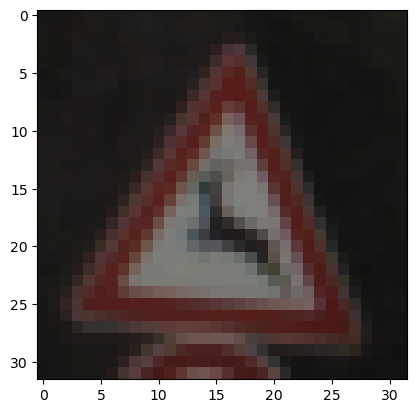

In [8]:
#Visulalise the image
item=800

plt.imshow(X_train[item])
y_train[item]

# Data Preprocessing

In [9]:
## suffle the data for the training
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)

In [10]:
## Convert the image to gray scale image (Averaging the RGB)

X_train_gray=np.sum(X_train/3,axis=3, keepdims=True)

X_valid_gray=np.sum(X_valid/3,axis=3, keepdims=True)

X_test_gray=np.sum(X_test/3,axis=3, keepdims=True)

In [11]:
X_train_gray.shape

(34799, 32, 32, 1)

In [12]:
type(X_train_gray)

numpy.ndarray

In [13]:
## Normalise the pixels of gray scale image (image are normalise: so pixels are in range -1 to 1)
X_train_gray_norm=(X_train_gray-128)/128
X_valid_gray_norm=(X_valid_gray-128)/128
X_test_gray_norm=(X_test_gray-128)/128

In [14]:
X_test_gray_norm[0]

array([[[ 0.1171875 ],
        [ 0.10416667],
        [ 0.11458333],
        ...,
        [-0.07552083],
        [-0.04947917],
        [-0.16666667]],

       [[ 0.12760417],
        [ 0.1171875 ],
        [ 0.12760417],
        ...,
        [ 0.140625  ],
        [ 0.13020833],
        [ 0.11979167]],

       [[ 0.125     ],
        [ 0.13020833],
        [ 0.109375  ],
        ...,
        [ 0.15364583],
        [ 0.15885417],
        [ 0.14583333]],

       ...,

       [[ 0.09635417],
        [ 0.07552083],
        [ 0.08333333],
        ...,
        [ 0.09635417],
        [ 0.09375   ],
        [ 0.1171875 ]],

       [[ 0.08854167],
        [ 0.08333333],
        [ 0.06770833],
        ...,
        [ 0.08072917],
        [ 0.08854167],
        [ 0.09635417]],

       [[ 0.078125  ],
        [ 0.06510417],
        [ 0.09114583],
        ...,
        [ 0.09375   ],
        [ 0.09895833],
        [ 0.10416667]]])

### Image information after gray scale and normalisation

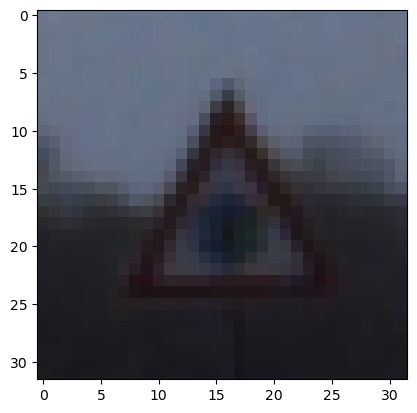

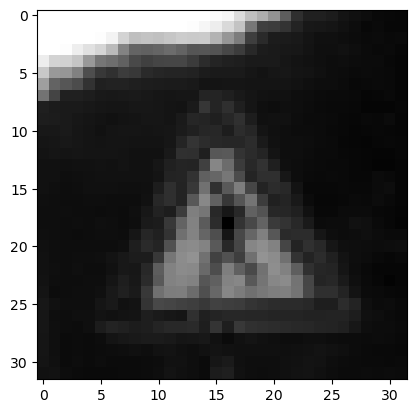

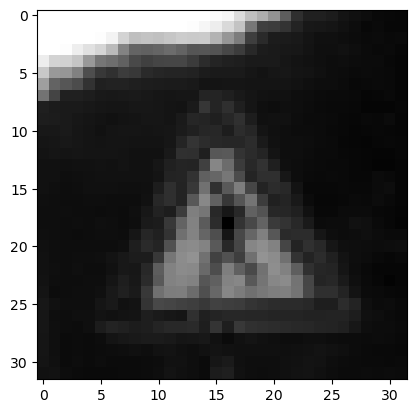

In [15]:
index=610
##Actual image
plt.figure()
plt.imshow(X_train[index].squeeze())
## Gray scale image
plt.figure()
plt.imshow(X_test_gray[index].squeeze(),cmap='gray')
# ## Gray scale normalise image
plt.figure()
plt.imshow(X_test_gray_norm[index].squeeze(),cmap='gray')

# Architecture of CNN

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [17]:
## 1st layer of CNN
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())



In [18]:
## 2nd conv layer

cnn_model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
cnn_model.add(AveragePooling2D())

In [19]:
## 3rd layer
cnn_model.add(Flatten())

## 4th layer
cnn_model.add(Dense(units=120,activation='relu'))

##5th layer
cnn_model.add(Dense(units=84,activation='relu'))

## output layer
cnn_model.add(Dense(units=43,activation='softmax'))

In [20]:
## Compile the model

cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])


In [21]:
## fit the model
Model=cnn_model.fit(x=X_train_gray_norm,y=y_train,batch_size=500,epochs=200,verbose=1,validation_data=(X_valid_gray_norm,y_valid))

Epoch 1/200
70/70 [==============================] - 13s 151ms/step - loss: 3.1752 - accuracy: 0.1745 - val_loss: 2.6563 - val_accuracy: 0.3007
Epoch 2/200
70/70 [==============================] - 10s 141ms/step - loss: 1.6457 - accuracy: 0.5379 - val_loss: 1.3536 - val_accuracy: 0.6152
Epoch 3/200
70/70 [==============================] - 10s 141ms/step - loss: 0.9149 - accuracy: 0.7406 - val_loss: 0.9727 - val_accuracy: 0.6995
Epoch 4/200
70/70 [==============================] - 10s 142ms/step - loss: 0.6653 - accuracy: 0.8144 - val_loss: 0.8423 - val_accuracy: 0.7531
Epoch 5/200
70/70 [==============================] - 10s 142ms/step - loss: 0.5370 - accuracy: 0.8555 - val_loss: 0.6882 - val_accuracy: 0.7982
Epoch 6/200
70/70 [==============================] - 10s 142ms/step - loss: 0.4583 - accuracy: 0.8754 - val_loss: 0.6957 - val_accuracy: 0.8011
Epoch 7/200
70/70 [==============================] - 10s 143ms/step - loss: 0.3907 - accuracy: 0.8972 - val_loss: 0.6391 - val_accuracy:

70/70 [==============================] - 10s 143ms/step - loss: 0.0143 - accuracy: 0.9961 - val_loss: 0.7586 - val_accuracy: 0.8753
Epoch 58/200
70/70 [==============================] - 10s 142ms/step - loss: 0.0191 - accuracy: 0.9944 - val_loss: 0.7835 - val_accuracy: 0.8701
Epoch 59/200
70/70 [==============================] - 10s 143ms/step - loss: 0.0161 - accuracy: 0.9955 - val_loss: 0.8016 - val_accuracy: 0.8712
Epoch 60/200
70/70 [==============================] - 10s 143ms/step - loss: 0.0161 - accuracy: 0.9955 - val_loss: 0.7539 - val_accuracy: 0.8726
Epoch 61/200
70/70 [==============================] - 10s 142ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.7406 - val_accuracy: 0.8773
Epoch 62/200
70/70 [==============================] - 10s 141ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 0.6763 - val_accuracy: 0.8873
Epoch 63/200
70/70 [==============================] - 10s 141ms/step - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0.7067 - val_accuracy: 0.884

70/70 [==============================] - 10s 143ms/step - loss: 8.5837e-04 - accuracy: 0.9999 - val_loss: 0.7326 - val_accuracy: 0.8959
Epoch 114/200
70/70 [==============================] - 10s 143ms/step - loss: 5.3258e-04 - accuracy: 1.0000 - val_loss: 0.7393 - val_accuracy: 0.8943
Epoch 115/200
70/70 [==============================] - 10s 144ms/step - loss: 5.1405e-04 - accuracy: 1.0000 - val_loss: 0.7326 - val_accuracy: 0.8982
Epoch 116/200
70/70 [==============================] - 10s 141ms/step - loss: 4.8807e-04 - accuracy: 1.0000 - val_loss: 0.7268 - val_accuracy: 0.8980
Epoch 117/200
70/70 [==============================] - 10s 146ms/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.7978 - val_accuracy: 0.8896
Epoch 118/200
70/70 [==============================] - 10s 145ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.6608 - val_accuracy: 0.9016
Epoch 119/200
70/70 [==============================] - 10s 144ms/step - loss: 0.0486 - accuracy: 0.9843 - val_loss: 0.7107

70/70 [==============================] - 10s 142ms/step - loss: 1.2831e-04 - accuracy: 1.0000 - val_loss: 0.6717 - val_accuracy: 0.9077
Epoch 169/200
70/70 [==============================] - 10s 142ms/step - loss: 1.1960e-04 - accuracy: 1.0000 - val_loss: 0.6732 - val_accuracy: 0.9079
Epoch 170/200
70/70 [==============================] - 10s 144ms/step - loss: 1.1074e-04 - accuracy: 1.0000 - val_loss: 0.6852 - val_accuracy: 0.9086
Epoch 171/200
70/70 [==============================] - 10s 143ms/step - loss: 1.2619e-04 - accuracy: 1.0000 - val_loss: 0.6841 - val_accuracy: 0.9075
Epoch 172/200
70/70 [==============================] - 10s 144ms/step - loss: 1.0204e-04 - accuracy: 1.0000 - val_loss: 0.6833 - val_accuracy: 0.9079
Epoch 173/200
70/70 [==============================] - 10s 142ms/step - loss: 1.0184e-04 - accuracy: 1.0000 - val_loss: 0.6937 - val_accuracy: 0.9082
Epoch 174/200
70/70 [==============================] - 10s 143ms/step - loss: 1.0309e-04 - accuracy: 1.0000 - val_

# Model Evaluation

In [22]:
score= cnn_model.evaluate(x=X_test_gray_norm,y=y_test,verbose=0)

In [24]:
print('Accuracy of model', score[1])

Accuracy of model 0.8970704674720764


In [25]:
Model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

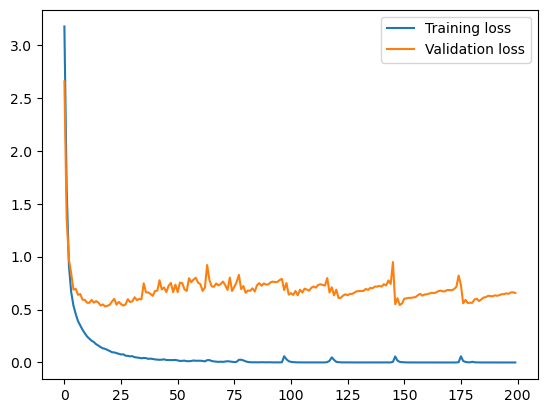

In [31]:
# Plot of losses with epose
loss=Model.history['loss']
validation_loss=Model.history['val_loss']
plt.plot(range(len(loss)),loss,label='Training loss')
plt.plot(range(len(validation_loss)),validation_loss,label='Validation loss')
plt.legend()

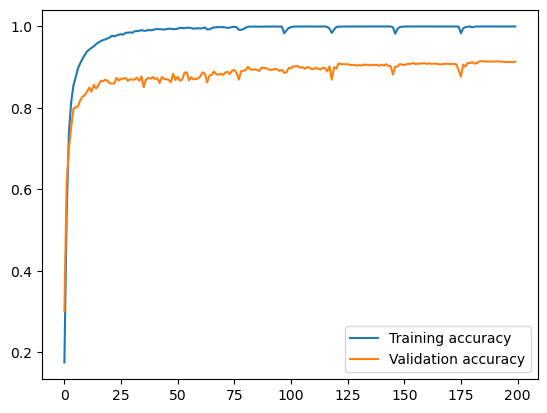

In [32]:
##Plot of accuracy 
training_acc=Model.history['accuracy']
validation_acc=Model.history['val_accuracy']
plt.plot(range(len(training_acc)),training_acc,label='Training accuracy')
plt.plot(range(len(validation_acc)),validation_acc,label='Validation accuracy')
plt.legend()

In [37]:
## Prediction
y_pred=cnn_model.predict(X_test_gray_norm)

395/395 [==============================] - 2s 4ms/step


In [39]:
y_pred.shape

(12630, 43)

In [40]:
y_pred[0]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.0197434e-34,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.3359054e-20, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       5.2785465e-37, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.6570424e-32, 0.0000000e+00, 0.0000000e+00], dtype=float32)

In [41]:
y_pred_class=np.argmax(y_pred,axis=1)

In [45]:
y_pred_class[0]

16

<Axes: >

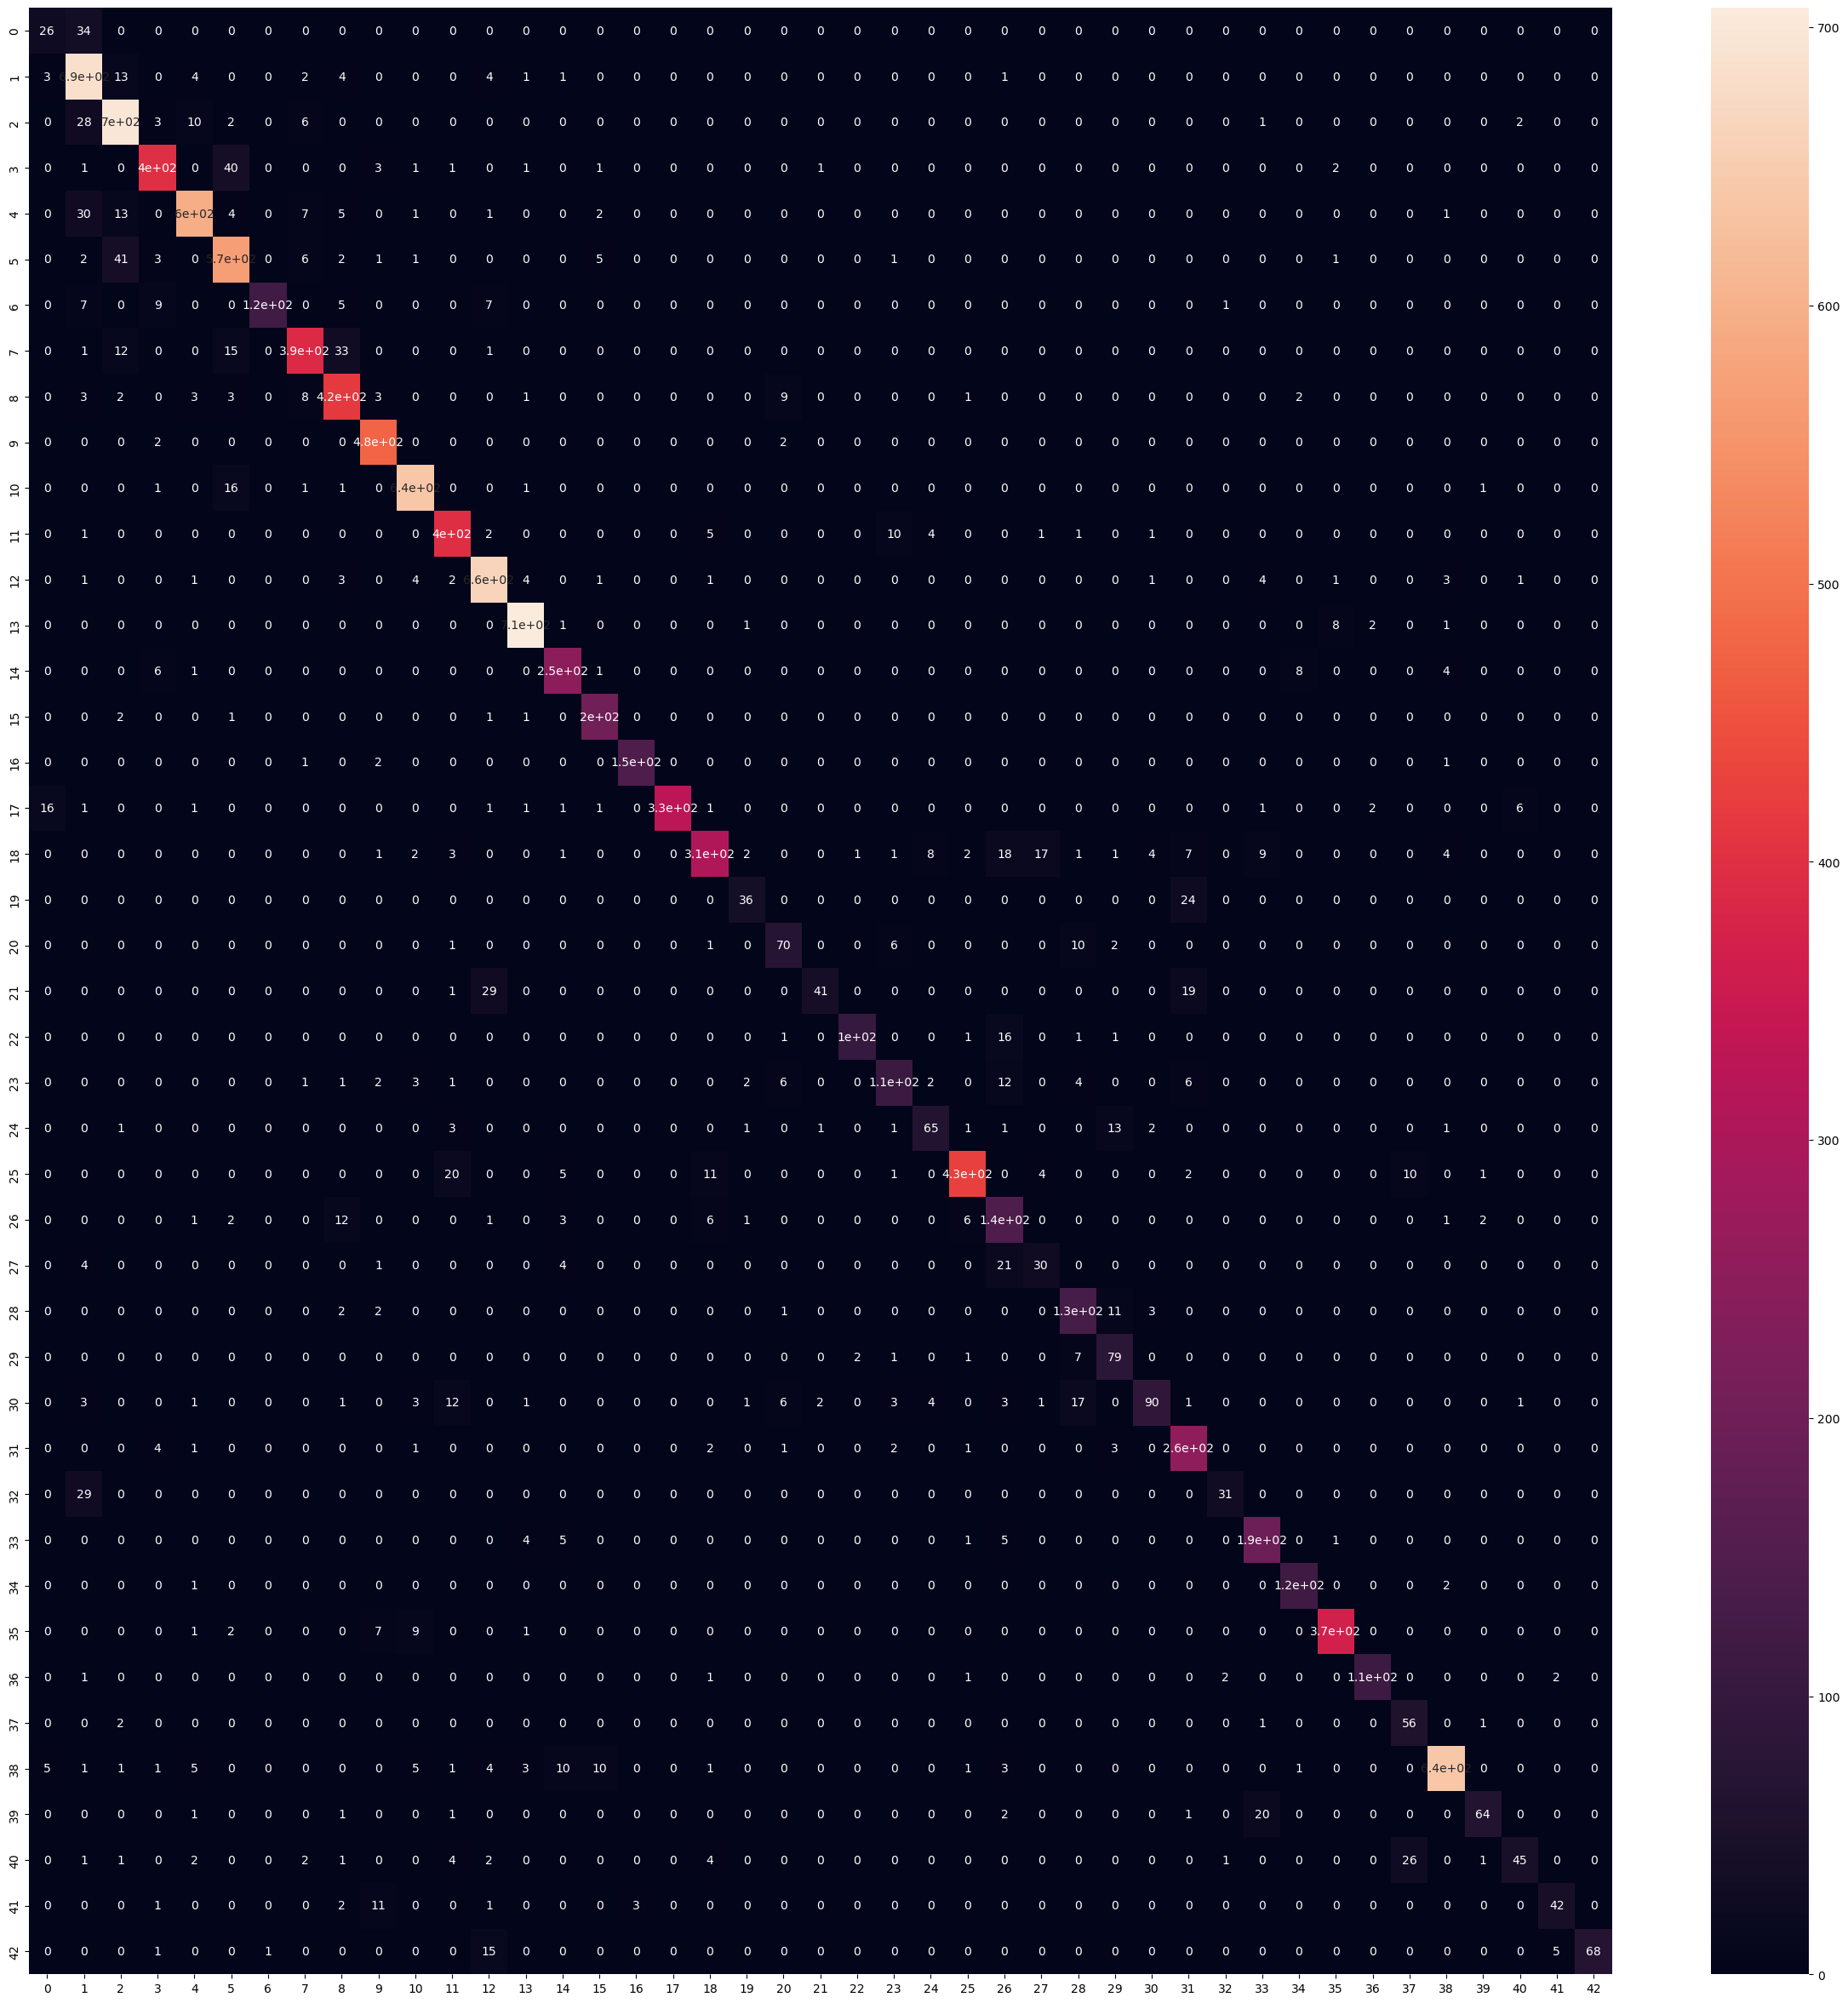

In [44]:
## Confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_class)
plt.figure(figsize=(30,30))
sns.heatmap(cm,annot=True)

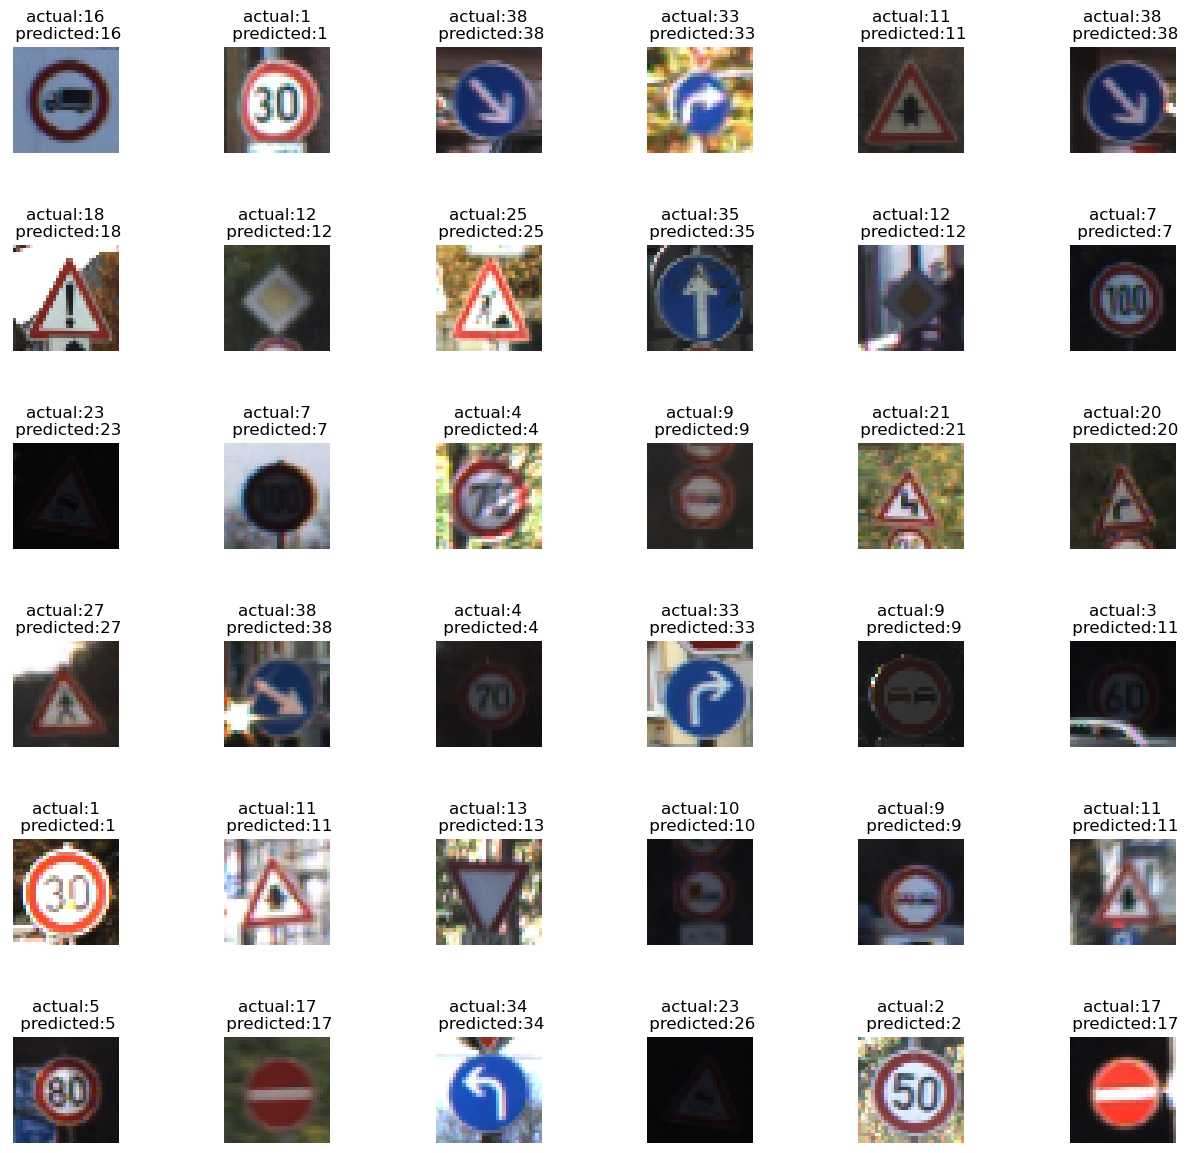

In [51]:
## See the some sample and their image
L=6
W=6
fig,ax=plt.subplots(L,W,figsize = (15,15))
ax=ax.ravel()
for i in range(L*W):
    ax[i].imshow(X_test[i])
    ax[i].set_title(f"actual:{y_test[i]}\n predicted:{y_pred_class[i]}")
    ax[i].axis('off')
    
plt.subplots_adjust(wspace=1)